# Notes
**Supposed to be used as a sort of showcase of how to use the tool**

*Unfinished, just a draft*

- Whenever a critical error occurs, we should think of it as also being a corruption error

In [21]:
%load_ext autoreload
%autoreload 2

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src import RegisterTree, Analyses

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
reg_tree = RegisterTree(data_directory="data", data_loading_timeout=120)
hwsec_reg_tree = RegisterTree(data_directory="data_hwsec", data_loading_timeout=120)

Running function _read_viable_seu_logs. Took: 8.57 seconds
Running function _create_register_tree. Took: 4.79 seconds
Running function _read_viable_seu_logs. Took: 3.92 seconds
Running function _create_register_tree. Took: 1.78 seconds


In [23]:
register_name = "ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibex_top.gen_regfile_ff.register_file_i"

node = reg_tree.get_node_by_path(register_name)
hwsec_node = hwsec_reg_tree.get_node_by_path(register_name)

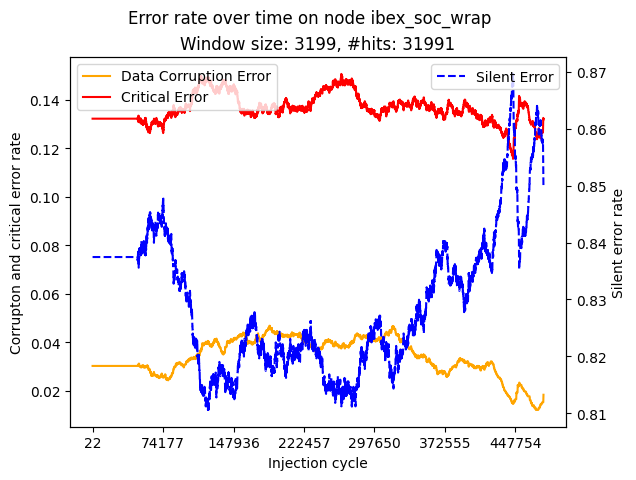

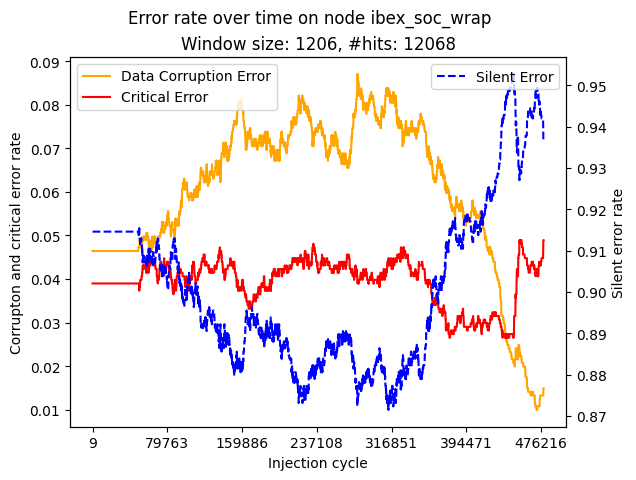

In [24]:
reg_tree_res, _ = Analyses.error_rate_over_time(reg_tree.root, plot=True)
hwsec_reg_tree_res, _ = Analyses.error_rate_over_time(hwsec_reg_tree.root, plot=True)

Non Secure
Data Corruption Error    0.033759
Critical Error           0.136288
Silent Error             0.829952
dtype: float64

Secure
Data Corruption Error    0.058419
Critical Error           0.039857
Silent Error             0.901724
dtype: float64


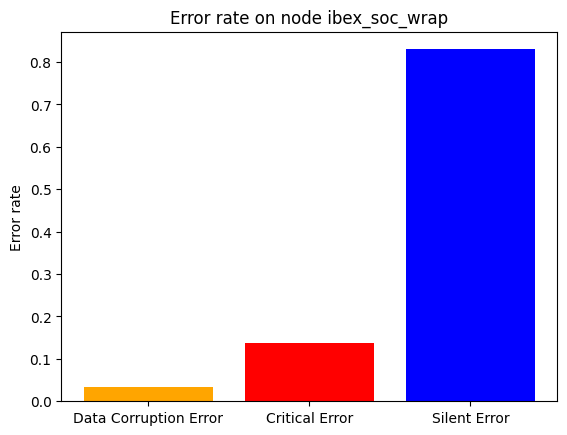

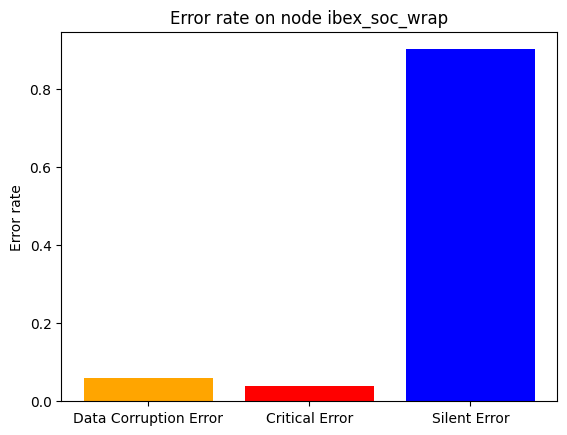

In [25]:
reg_tree_res, _ = Analyses.error_rate_by_type(reg_tree.root, plot=True)
hwsec_reg_tree_res, _ = Analyses.error_rate_by_type(hwsec_reg_tree.root, plot=True)

print("Non Secure")
print(reg_tree_res)
print()
print("Secure")
print(hwsec_reg_tree_res)

Non Secure
Data Corruption Error    0.078409
Critical Error           0.633428
Silent Error             0.288164
dtype: float64

Secure
Data Corruption Error    0.194828
Critical Error           0.118534
Silent Error             0.686638
dtype: float64


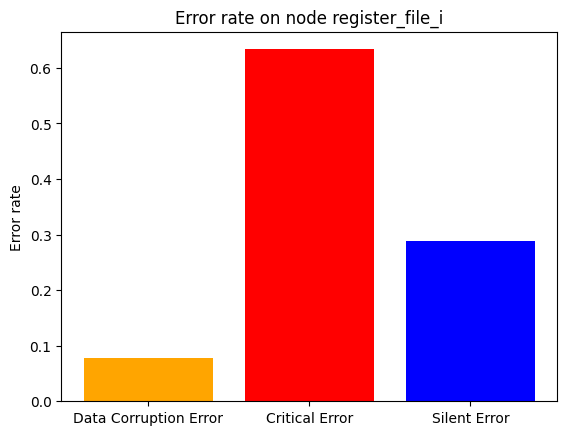

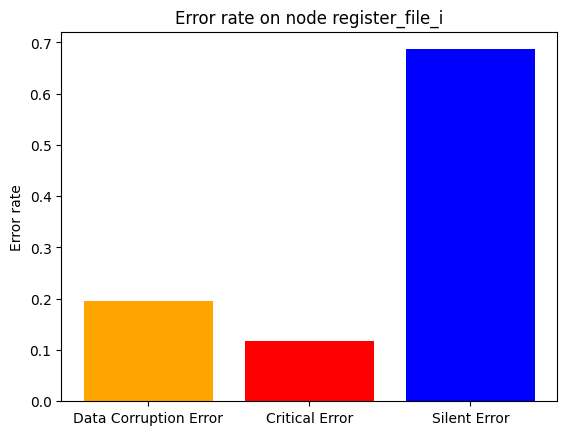

In [26]:
reg_tree_res, _ = Analyses.error_rate_by_type(node, plot=True)
hwsec_reg_tree_res, _ = Analyses.error_rate_by_type(hwsec_node, plot=True)

print("Non Secure")
print(reg_tree_res)
print()
print("Secure")
print(hwsec_reg_tree_res)

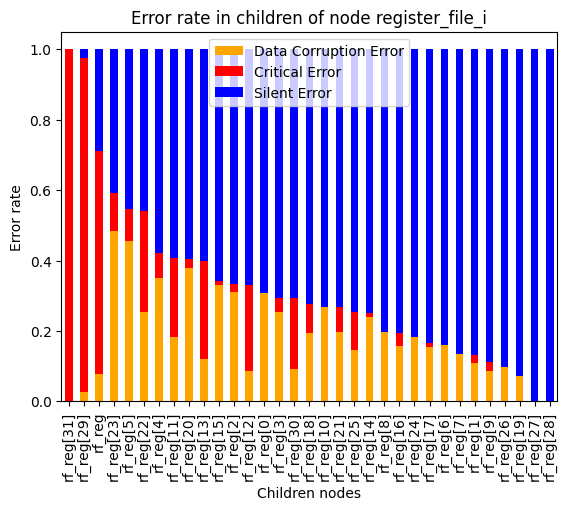

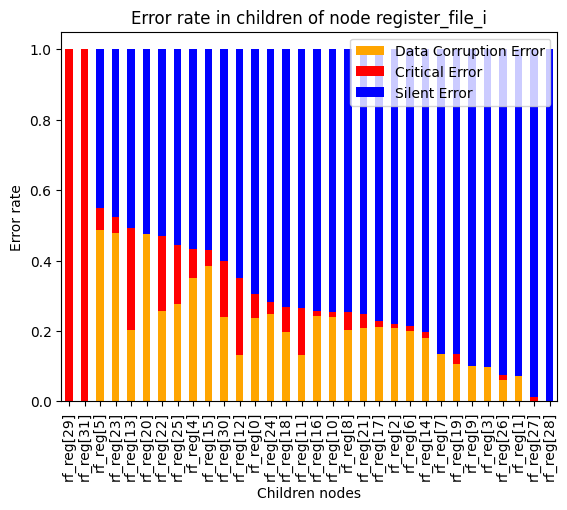

In [27]:
_ = Analyses.error_rate_by_type_in_children(node, plot=True)
_ = Analyses.error_rate_by_type_in_children(hwsec_node, plot=True)